<a href="https://colab.research.google.com/github/ananasik558/Practic/blob/main/MAIPractic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jul  9 07:26:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 50.0 MB/s eta 0:00:00


In [5]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00


In [6]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [7]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Jul  9 07:28 .
drwxr-xr-x 1 root root      4096 Jul  9 07:28 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [8]:
%cd {HOME}/yolov9

/content/yolov9


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="V3z0Vaa7NaWQtMVuwlol")
project = rf.workspace("khaing").project("sunflower_detection")
version = project.version(5)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to sunflower_detection-5 in yolov9:: 100%|██████████| 1212/1212 [00:00<00:00, 6263.70it/s]


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
!python detect.py --weights /content/weights/gelan-c.pt --source /content/yolov9/sunflower_detection-5/train/images/3950020811_dab89bebc0_n_jpg.rf.c6d7b9c19bc7316118fe5a8dd2b68309.jpg --imgsz 640 --conf 0.1 --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/yolov9/sunflower_detection-5/train/images/3950020811_dab89bebc0_n_jpg.rf.c6d7b9c19bc7316118fe5a8dd2b68309.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/yolov9/sunflower_detection-5/train/images/3950020811_dab89bebc0_n_jpg.rf.c6d7b9c19bc7316118fe5a8dd2b68309.jpg: 640x640 3 persons, 1 train, 1 tie, 51.9ms
Speed: 0.5ms pre-process, 51.9ms inference, 518.9ms NMS per image at shape (1, 3, 640,

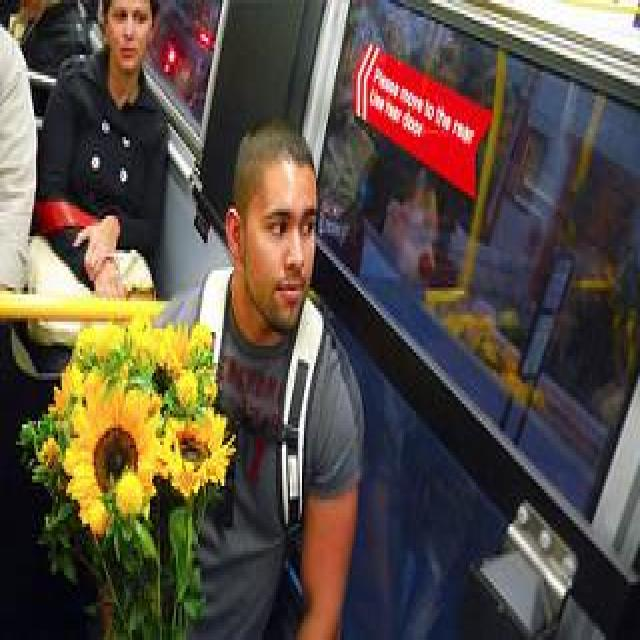

In [100]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/sunflower_detection-5/train/images/3950020811_dab89bebc0_n_jpg.rf.c6d7b9c19bc7316118fe5a8dd2b68309.jpg", width=600)

In [101]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-07-09 09:43:01.988384: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 09:43:01.988433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 09:43:01.989943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-09 09:43:01.997467: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 09:43:03.426479: W tensorf

In [102]:
!ls {HOME}/yolov9/runs/train/exp9/

confusion_matrix.png				     P_curve.png       train_batch2.jpg
events.out.tfevents.1720518184.3f1238180d91.38355.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					     R_curve.png       val_batch0_pred.jpg
hyp.yaml					     results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				     results.png       val_batch1_pred.jpg
labels.jpg					     train_batch0.jpg  weights
opt.yaml					     train_batch1.jpg


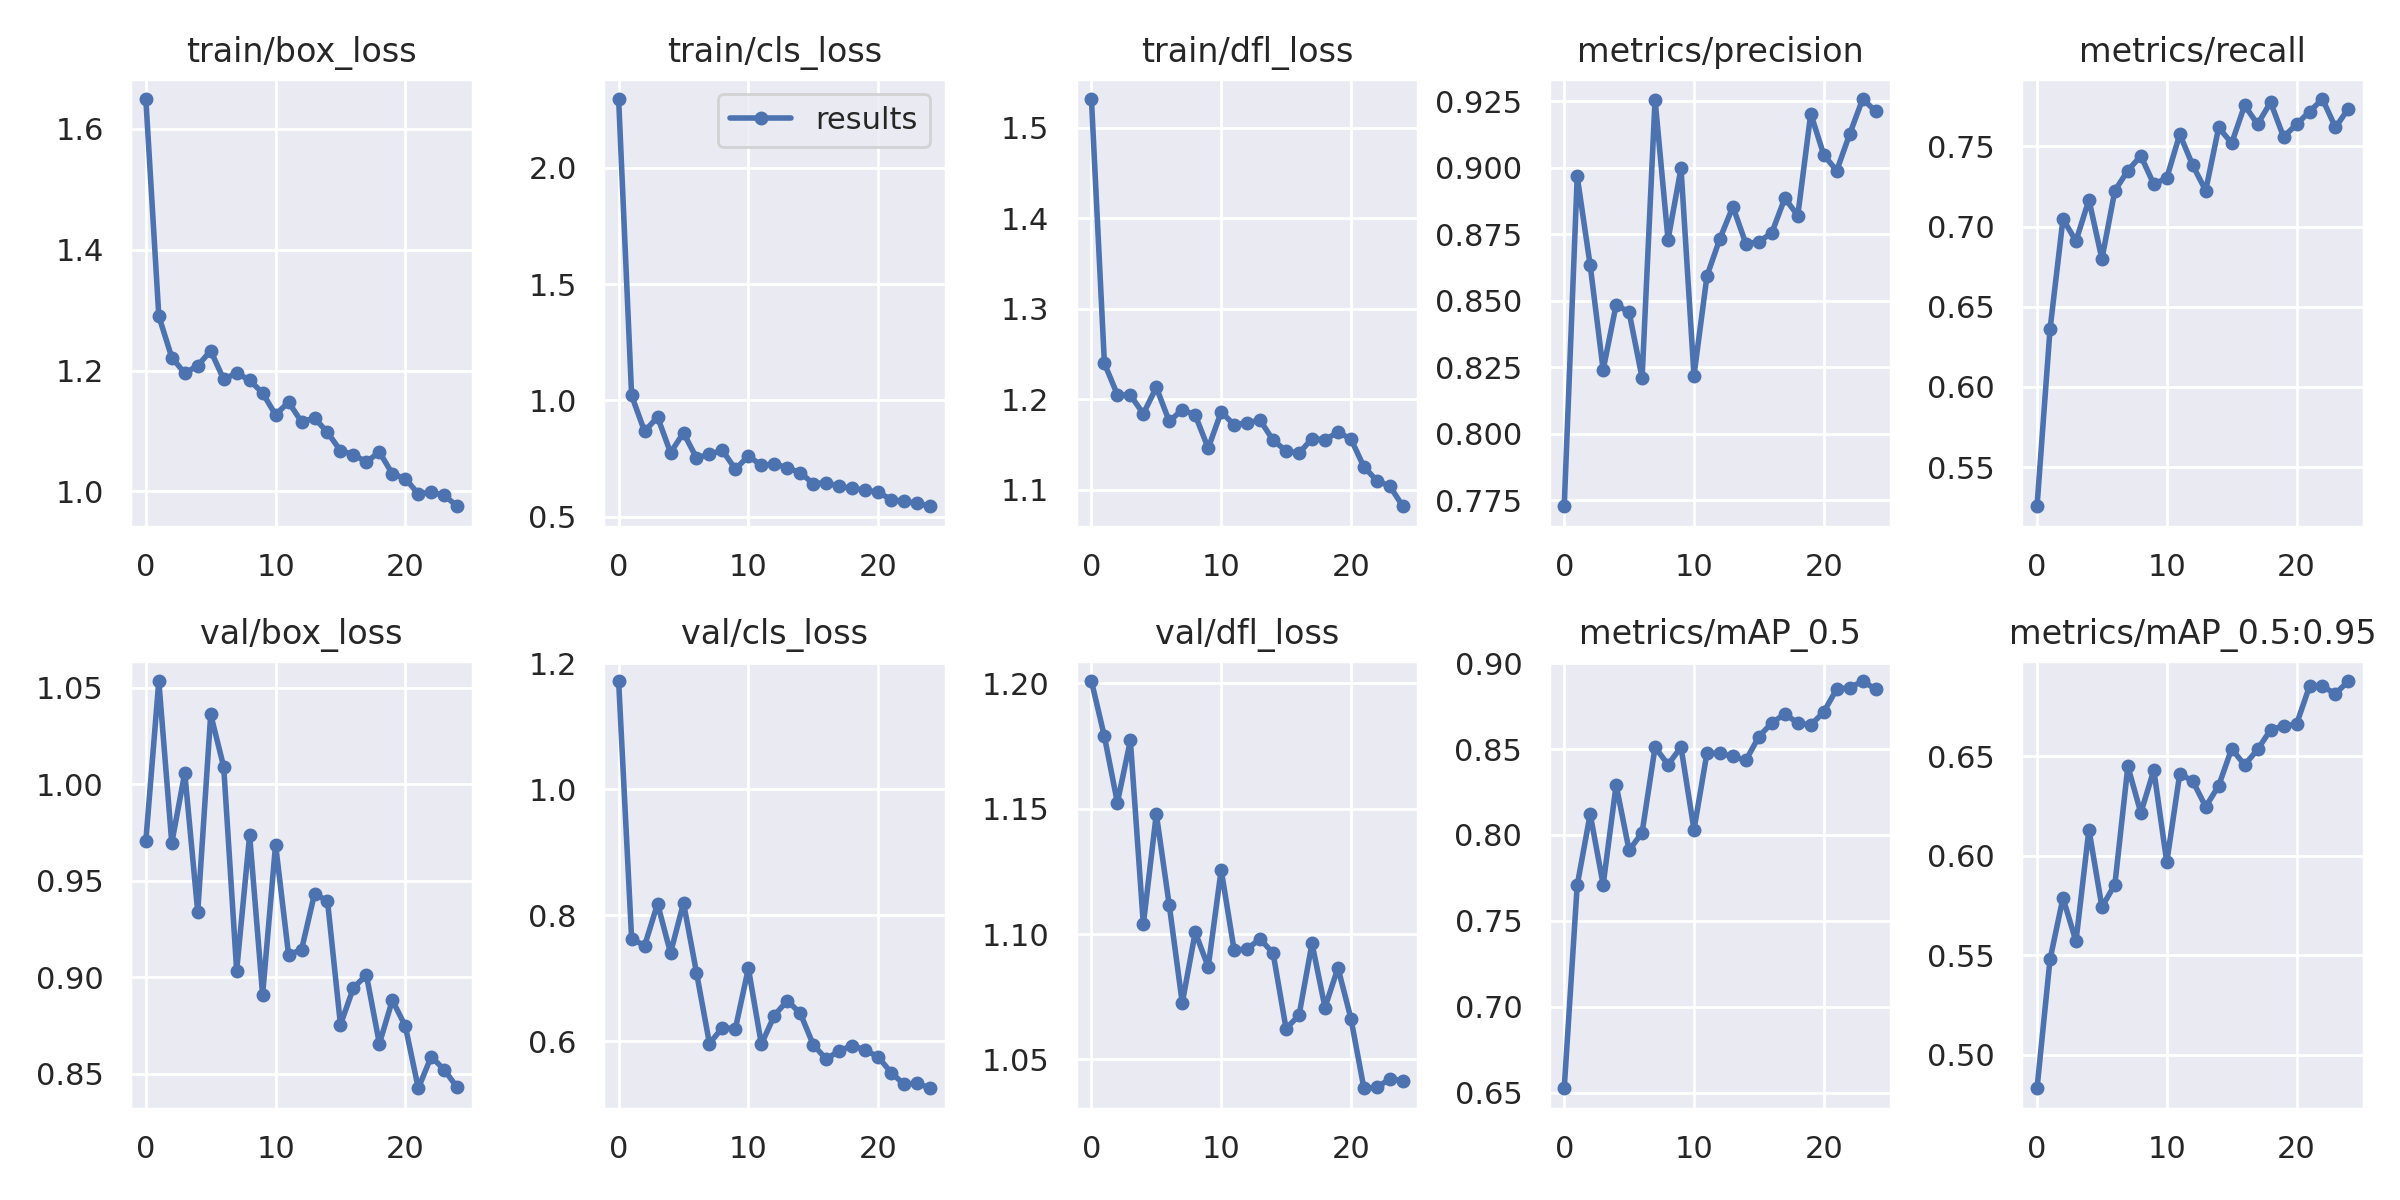

In [103]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp9/results.png", width=1000)

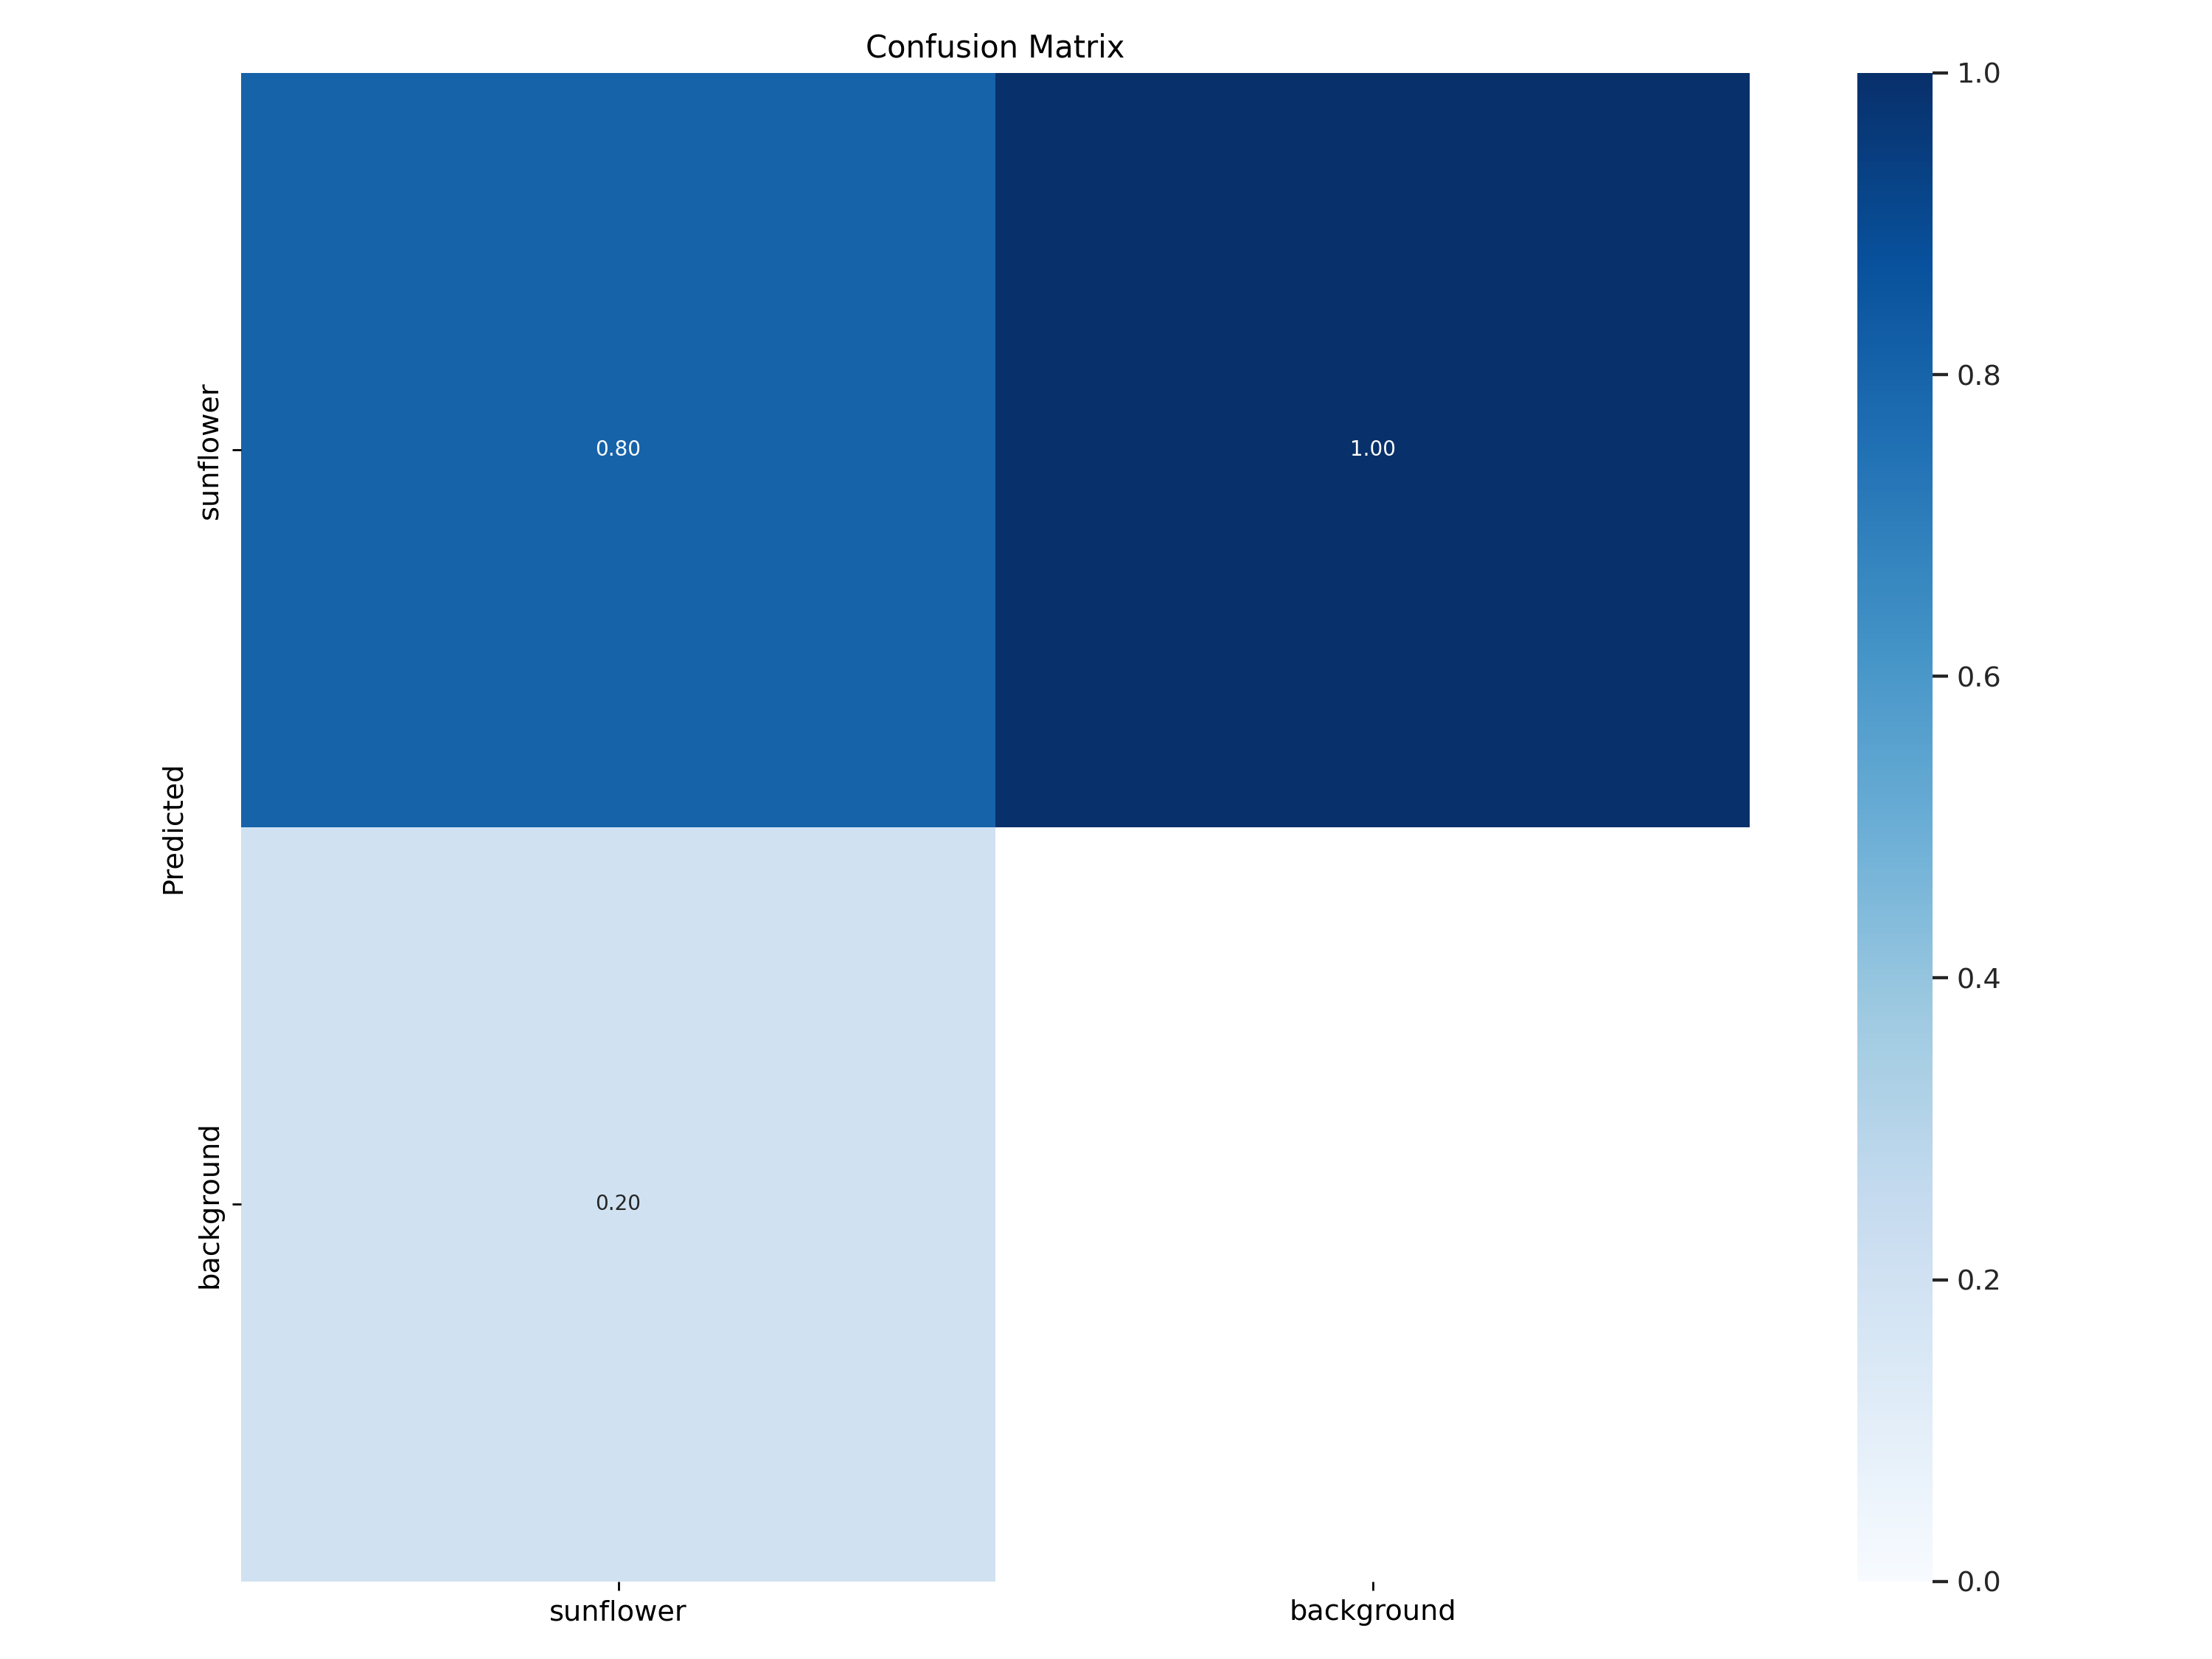

In [104]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp9/confusion_matrix.png", width=1000)

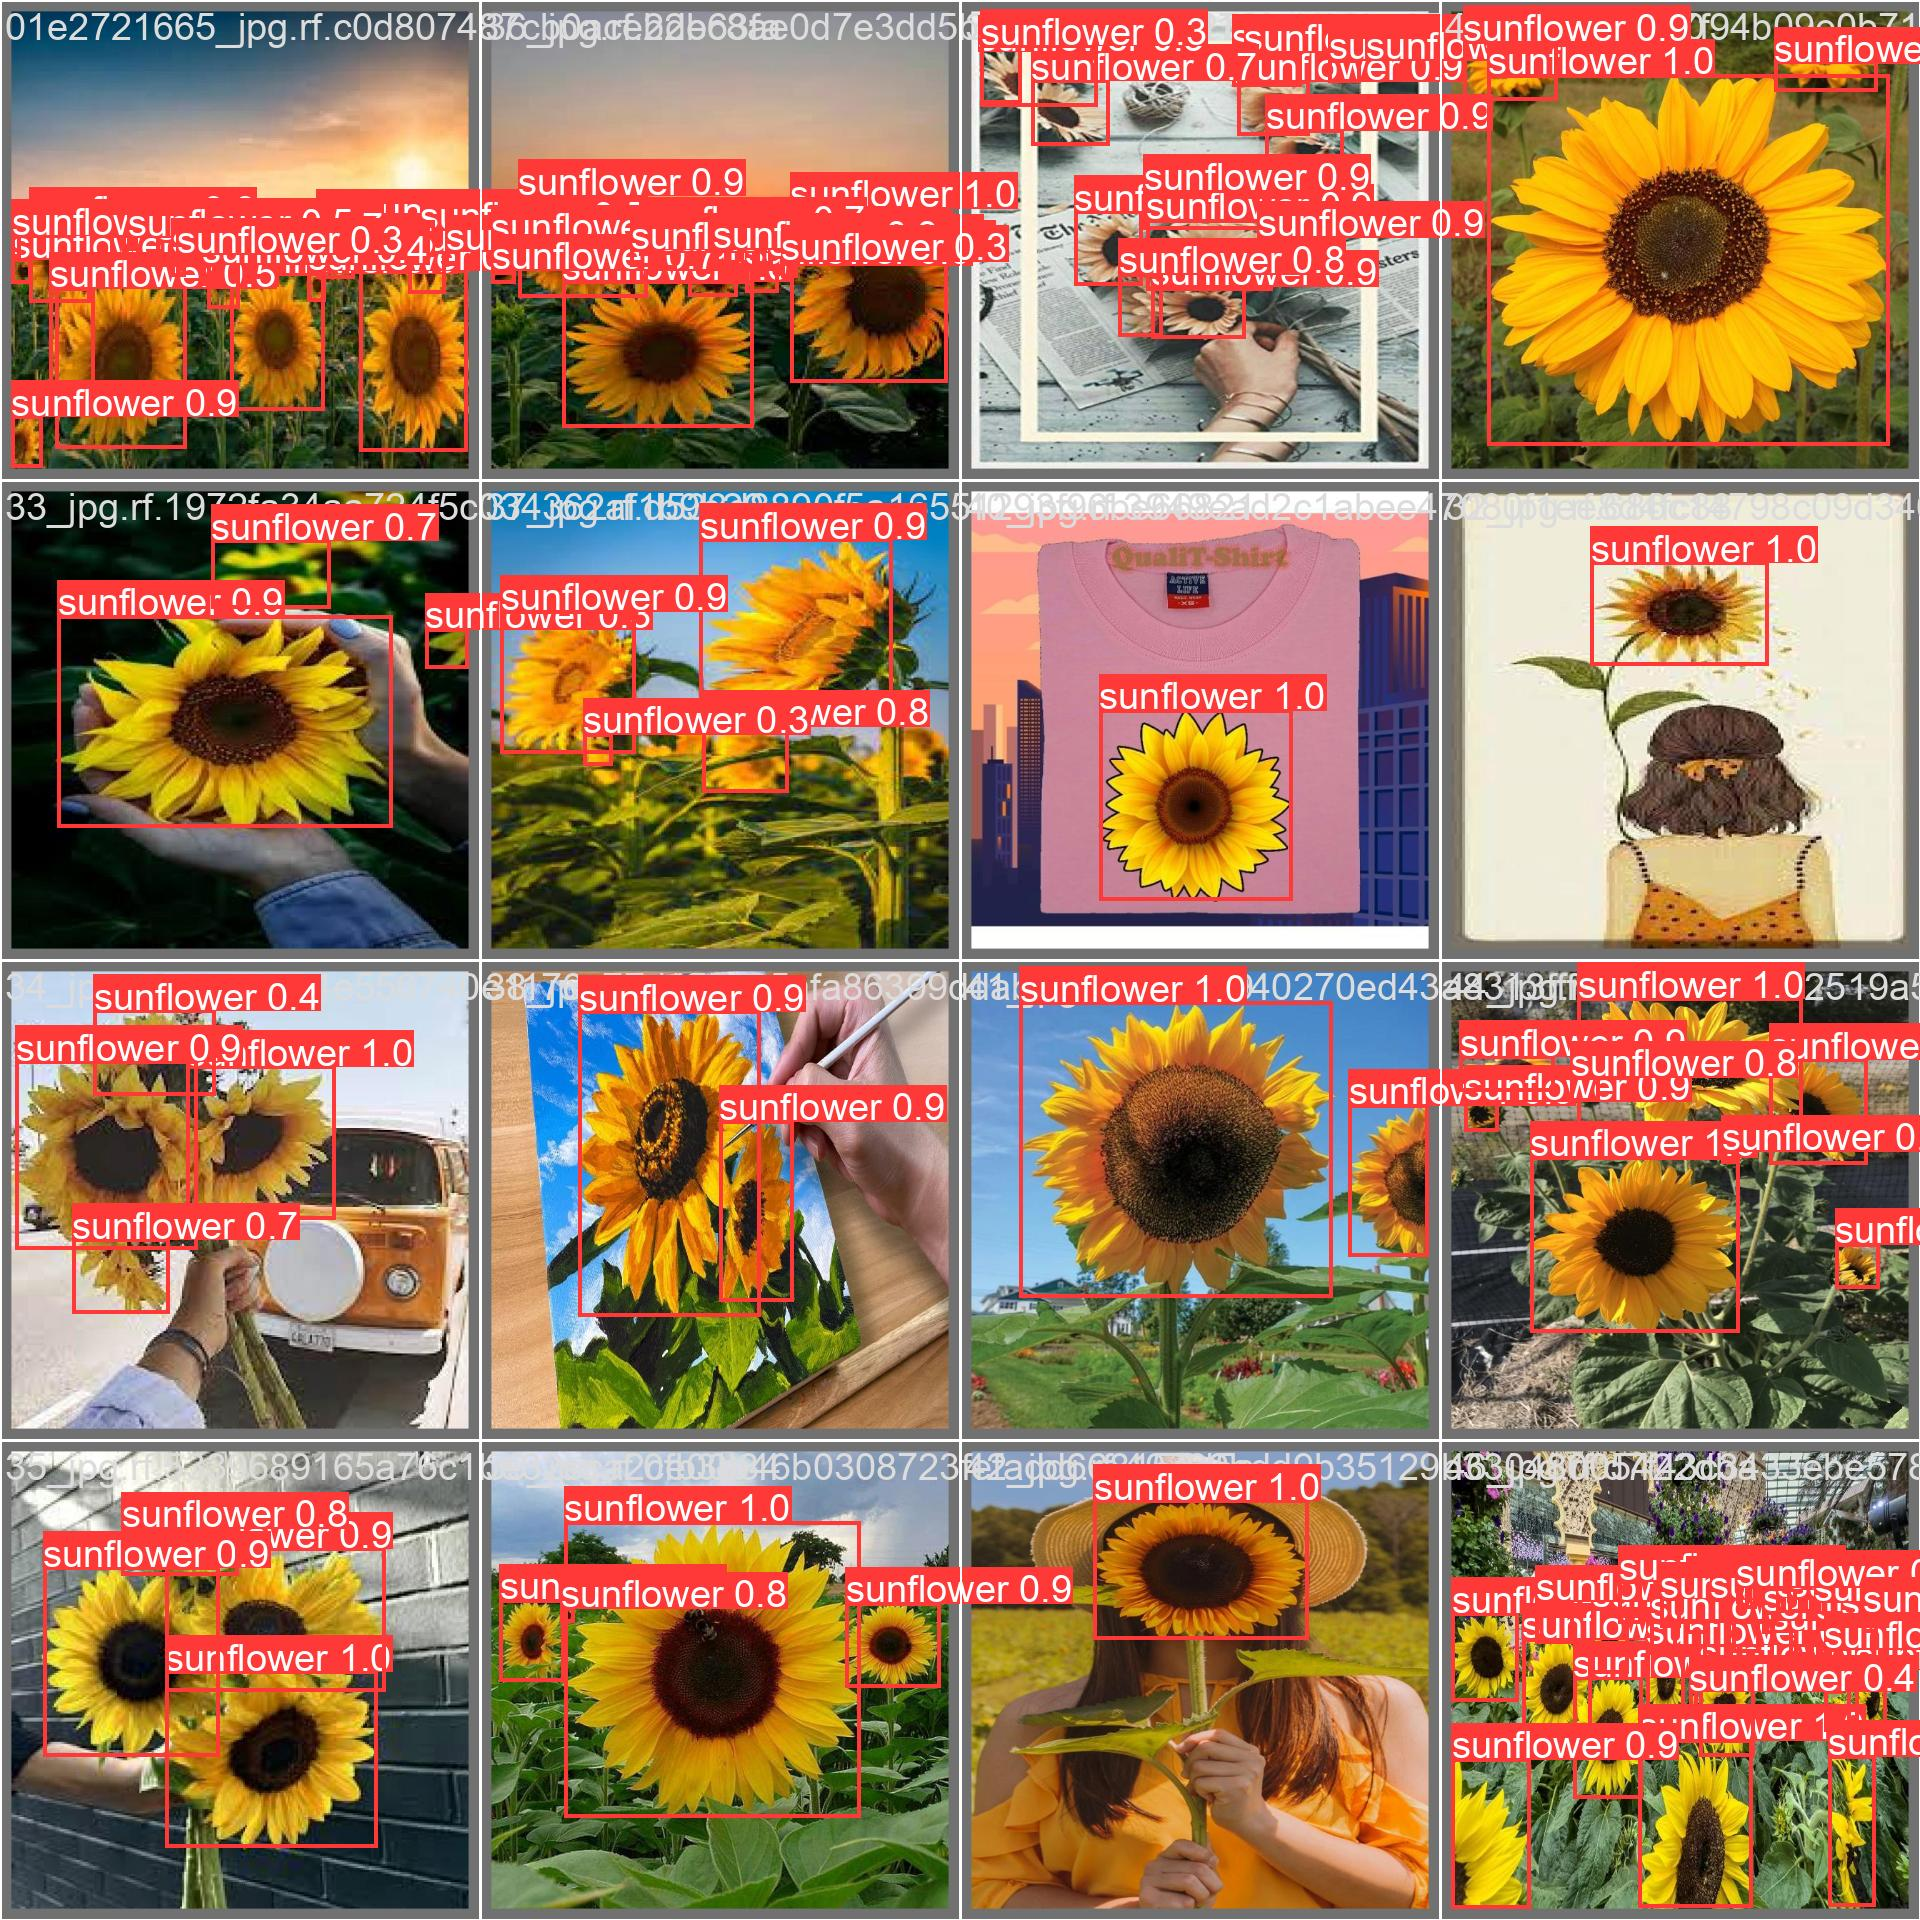

In [105]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp9/val_batch0_pred.jpg", width=1000)

In [106]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp9/weights/best.pt

/content/yolov9
val: data=/content/yolov9/sunflower_detection-5/data.yaml, weights=['/content/yolov9/runs/train/exp9/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/sunflower_detection-5/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:06<00:00,  3.04s/it]
                   all         60        508      0.922      0.771      0.884      0.687
Speed: 0.4ms pre-process, 35.4ms inferen

In [107]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source /content/yolov9/sunflower_detection-5/train/images/3950020811_dab89bebc0_n_jpg.rf.c6d7b9c19bc7316118fe5a8dd2b68309.jpg

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/sunflower_detection-5/train/images/3950020811_dab89bebc0_n_jpg.rf.c6d7b9c19bc7316118fe5a8dd2b68309.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
image 1/1 /content/yolov9/sunflower_detection-5/train/images/3950020811_dab89bebc0_n_jpg.rf.c6d7b9c19bc7316118fe5a8dd2b68309.jpg: 1280x1280 6 sunflowers, 136.7ms
Speed: 1.6ms pre-process, 136.7ms inference, 577.3ms NMS per image at sha

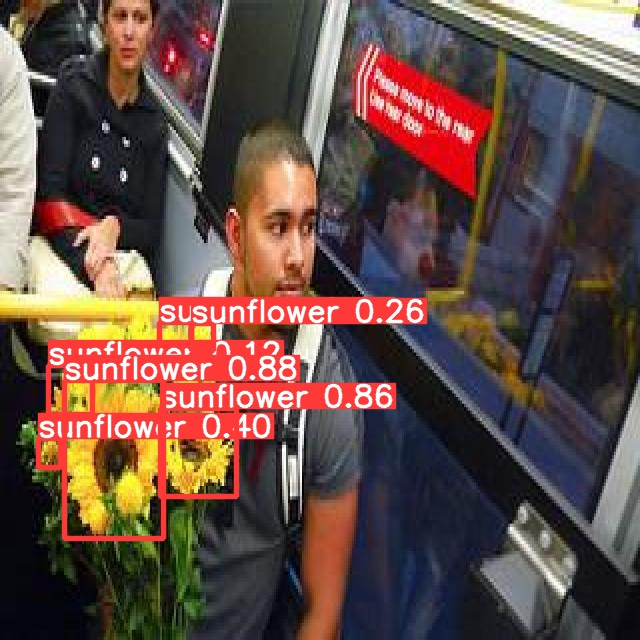

In [108]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp18/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))